In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm # Linear Regression from STATSMODEL
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,Food,Religion,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Size,Total_Sales
0,0.0,0.0,-1.437080,-0.877511,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,-1.142078,1.178756,3.625308,0.443914,902109.69
1,0.0,0.0,-1.448442,-1.373423,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,0.478730,-0.262822,-0.275839,1.048281,1434908.13
2,1.0,0.0,-1.331042,-1.205206,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,-1.022932,-1.124994,-0.275839,-0.245459,1408082.96
3,1.0,0.0,0.445110,-1.196468,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,-0.908679,0.560403,-0.275839,-0.417118,1160412.71
4,0.0,0.0,0.782703,-1.253268,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,0.818260,-0.252685,-0.275839,1.165667,2031852.16


In [4]:
x=df.drop("Total_Sales",axis=1)

## KMEANS

In [5]:
#clustering
wcss = []
K = range(1,10)
for num_clusters in list(K):
    kmeans = KMeans(n_clusters=num_clusters, init = "k-means++")
    kmeans.fit_predict(x)
    wcss.append(kmeans.inertia_)

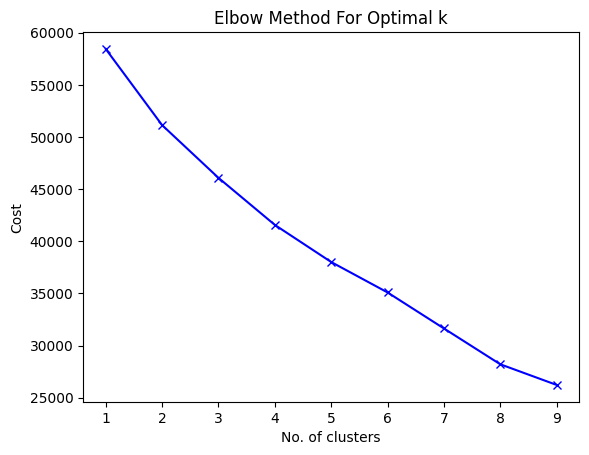

In [6]:
plt.plot(K, wcss, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [7]:
kmeans=KMeans(n_clusters=3,init="k-means++",random_state=0)

In [8]:
x=df.drop("Total_Sales",axis=1)
labels=kmeans.fit_predict(x)

In [9]:
set(labels)

{0, 1, 2}

In [10]:
silhouette_avg = silhouette_score(x, labels)
print(silhouette_avg)

0.2773931057628104


In [11]:
# #clustering
# K = range(2,10)
# for num_clusters in list(K):
#     kmeans = KMeans(n_clusters=num_clusters, init = "k-means++", random_state=0)
#     labels=kmeans.fit_predict(x)
#     silhouette_avg = silhouette_score(x, labels)
#     print(num_clusters,silhouette_avg)

In [12]:
cluster_df=pd.concat([x,df["Total_Sales"],pd.DataFrame(labels,columns=["cluster"])],axis=1)

In [13]:
cluster_df["cluster"].unique()

array([1, 0, 2], dtype=int32)

In [14]:
df1=cluster_df[cluster_df["cluster"]==0]

In [15]:
df1.shape

(3936, 15)

In [16]:
df2=cluster_df[cluster_df["cluster"]==1]

In [17]:
df2.shape

(353, 15)

In [18]:
df3=cluster_df[cluster_df["cluster"]==2]

In [19]:
df3.shape

(859, 15)

## CLUSTER1

In [20]:
df1.drop("cluster",axis=1,inplace=True)

In [21]:
X=df1.drop("Total_Sales",axis=1)
y=df1["Total_Sales"]

In [22]:
X.head()

,Food,Religion,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Size
1,0.0,0.0,-1.448442,-1.373423,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,0.478730,-0.262822,-0.275839,1.048281
2,1.0,0.0,-1.331042,-1.205206,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,-1.022932,-1.124994,-0.275839,-0.245459
3,1.0,0.0,0.445110,-1.196468,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,-0.908679,0.560403,-0.275839,-0.417118
4,0.0,0.0,0.782703,-1.253268,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,0.818260,-0.252685,-0.275839,1.165667
6,0.0,0.0,0.695059,-1.085051,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,-0.999063,0.062093,-0.275839,1.166885


In [23]:
X.shape

(3936, 13)

### Linear Regression

In [24]:
lr=LinearRegression()

In [25]:
lr.fit(X,y)

LinearRegression()

In [26]:
pred=lr.predict(X)

In [27]:
r2_score(y,pred)

0.6960588973766539

In [28]:
valid=pd.read_csv("validated.csv")
x1=valid.drop("Total_Sales",axis=1)
labels1=kmeans.predict(x1)

In [29]:
cluster_df_valid=pd.concat([x1,valid["Total_Sales"],pd.DataFrame(labels1,columns=["cluster"])],axis=1)

In [30]:
df1_valid=cluster_df_valid[cluster_df_valid["cluster"]==0]
df1_valid.drop("cluster",axis=1,inplace=True)
X1=df1_valid.drop("Total_Sales",axis=1)
y1=df1_valid["Total_Sales"]

In [31]:
pred=lr.predict(X1)

In [32]:
def adj_r2(y_true,y_pred,X,y):
    r2_score1=r2_score(y_true=y_true,y_pred=y_pred)
    n=X.shape[0]
    p=X.shape[1]
    formula=1-((1-r2_score1)*(n-1)/(n-p-1))
    return formula

In [33]:
r2_score(y1,pred)

0.7128155411115193

### statsmodels

In [34]:
#Adding Intercept term to the model
X_train=sm.add_constant(X)
X_test=sm.add_constant(X1)

In [35]:
#Converting into Dataframe
X_train_d=pd.DataFrame(X)


#Printing the Model Statistics
model_train = sm.OLS(y.values.reshape(-1,1),X_train).fit()
print(model_train.summary())
print("---------------------------------------------------------------")

model_test= sm.OLS(y1.values.reshape(-1,1),X_test).fit()
print(model_test.summary())



#Checking the VIF Value

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] =[variance_inflation_factor(X_train_d.values, j) for j in range(X_train_d.shape[1])]
vif["features"] = X_train_d.columns
vif.round(1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     748.7
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        08:04:19   Log-Likelihood:                -55282.
No. Observations:                3936   AIC:                         1.106e+05
Df Residuals:                    3923   BIC:                         1.107e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Food               3.044e+04   1.41e+0

,VIF Factor,features
0,2.0,Food
1,2.6,Religion
2,1.2,Temperature
3,1.2,Fuel_Price
4,3.0,MarkDown1
5,1.1,MarkDown2
6,1.2,MarkDown3
7,2.1,MarkDown4
8,2.2,MarkDown5
9,1.3,CPI


### LASSO

In [36]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X, y)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [37]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

7.190811525911301

In [38]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(X, y)

Lasso(alpha=7.190811525911301)

In [39]:
prediction_lasso=lasso_reg.predict(X)

In [40]:
r2_score(y,prediction_lasso)

0.6960584887756327

In [41]:
prediction_lasso_valid=lasso_reg.predict(X1)

In [42]:
r2_score(y1,prediction_lasso_valid)

0.7128285853392697

<AxesSubplot:xlabel='Total_Sales', ylabel='Density'>

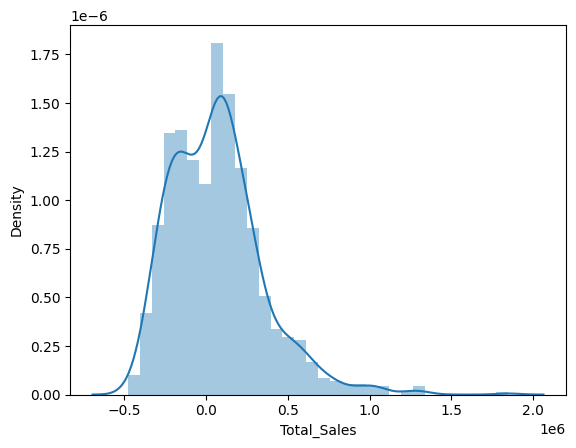

In [43]:
#errors are normally distributed
import seaborn as sns

sns.distplot(y1-prediction_lasso_valid)

### RIDGE

In [44]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X, y)

RidgeCV(alphas=array([3.60627371, 3.94584594, 3.64222797, 7.77386687, 5.534881  ,
       7.63463364, 7.34920711, 5.76008847, 5.34575168, 6.23841878,
       2.07941963, 4.78853739, 8.12447938, 7.814947  , 3.79160659,
       7.61889345, 1.67463105, 5.88151507, 6.73192768, 4.25059572,
       7.27539153, 6.64024047, 3.62713549, 4.3642128 , 7.20726145,
       8.71289413, 9.68101106, 2.7764285 , 5.47106749, 7.6143333 ,
       7.92843453, 0.20788724, 0.75760482, 2.72779332, 4.78284475,
       8.60386286, 2.89765026, 7.52011479, 3.68598202, 1.45271173,
       8.43942587, 7.82052651, 7.30535461, 7.02141673, 1.05906905,
       0.13678643, 7.2993222 , 5.74042146, 3.76327944, 8.88768959]),
        cv=10, normalize=True)

In [45]:
prediction_ridge=ridgecv.predict(X)

In [46]:
r2_score(y,prediction_ridge)

0.6785728749262248

In [47]:
prediction_ridge_valid=ridgecv.predict(X1)

In [48]:
r2_score(y1,prediction_ridge_valid)

0.6974352212592256

### Elastic Net

In [49]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(X, y)

ElasticNetCV(cv=10)

In [50]:
elasticCV.alpha_

910.7750762883863

In [51]:
elasticCV.l1_ratio

0.5

In [52]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(X, y)

ElasticNet(alpha=910.7750762883863)

In [53]:
prediction_elastic=elasticnet_reg.predict(X)

In [54]:
r2_score(y,prediction_elastic)

0.0032650634981826743

In [55]:
prediction_elastic_valid=elasticnet_reg.predict(X1)

In [56]:
r2_score(y1,prediction_elastic_valid)

0.0029318969556925145

### SVR

In [57]:
# svr=SVR()
# params={"kernel":['linear', 'poly', 'rbf', 'sigmoid'],"degree":[1,2,3],"gamma":['scale', 'auto'],"tol":[1e-1,1e-2,1e-3,1e-4,1e-5],"C":[0.5,0.6,0.7,0.8,0.9,1.0]}
# g=GridSearchCV(estimator=svr,param_grid=params,cv=100)
# g.fit(X,y)
# g.best_params_

In [58]:
svr=SVR(kernel="rbf",gamma="auto",tol=1e-4,C=0.5)
# kfold_validation=KFold(10)
# results=cross_val_score(model,X,y,cv=kfold_validation)
# print(results)
# print(np.mean(results))

In [59]:
svr.fit(X,y)

SVR(C=0.5, gamma='auto', tol=0.0001)

In [60]:
prediction_svr=svr.predict(X)

In [61]:
r2_score(y,prediction_svr)

-0.0315487595726327

In [62]:
prediction_svr_valid=svr.predict(X1)

In [63]:
r2_score(y1,prediction_svr_valid)

-0.025742285160578637

### Decision Tree

In [64]:
# model=DecisionTreeRegressor(max_depth=6)
# kfold_validation=KFold(10)
# results=cross_val_score(model,X,y,cv=kfold_validation)
# print(results)
# print(np.mean(results))

In [65]:
# dr=DecisionTreeRegressor()
# params={"criterion":['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],"splitter":['best', 'random'],"max_depth":[2,3,4,5,6,7,8,9,10],"min_samples_split":[0.5,0.6,0.7,2,3,4,5],"min_samples_leaf":[2,3,4,5,6],"max_features":['auto', 'sqrt', 'log2'],"max_leaf_nodes":[1,2,3,4,5,6,7,8,9,10]}
# g=GridSearchCV(estimator=dr,param_grid=params,cv=10)
# g.fit(X,y)
# g.best_params_

In [66]:
dt_model1 = DecisionTreeRegressor(max_depth=6,min_samples_split=20,min_samples_leaf=20,max_leaf_nodes=7,max_features=0.8,random_state=0)
dt_model1.fit(X,y)

DecisionTreeRegressor(max_depth=6, max_features=0.8, max_leaf_nodes=7,
                      min_samples_leaf=20, min_samples_split=20,
                      random_state=0)

In [67]:
dt_model1.score(X,y)

0.7260591226992177

In [68]:
dt_model1.score(X1, y1)

0.7045482472578032

### KNN

In [69]:
knn=KNeighborsRegressor(n_neighbors=4,algorithm="brute")

In [70]:
knn.fit(X,y)

KNeighborsRegressor(algorithm='brute', n_neighbors=4)

In [71]:
knn.score(X,y)

0.9341454068616372

In [72]:
knn.score(X1, y1)

0.8643609634775197

# Cluster2

In [73]:
df2.drop("cluster",axis=1,inplace=True)

In [74]:
XX=df2.drop("Total_Sales",axis=1)
yy=df2["Total_Sales"]

### Linear Regression

In [75]:
lr=LinearRegression()

In [76]:
lr.fit(XX,yy)

LinearRegression()

In [77]:
pred=lr.predict(XX)

In [78]:
r2_score(yy,pred)

0.7188299741144935

In [79]:
df2_valid=cluster_df_valid[cluster_df_valid["cluster"]==1]
df2_valid.drop("cluster",axis=1,inplace=True)
X2=df2_valid.drop("Total_Sales",axis=1)
y2=df2_valid["Total_Sales"]

In [80]:
pred=lr.predict(X2)

In [81]:
r2_score(y2,pred)

0.5410604626300053

### Statsmodel

In [82]:
#Adding Intercept term to the model
X_train=sm.add_constant(XX)
X_test=sm.add_constant(X2)

In [83]:
#Converting into Dataframe
X_train_d=pd.DataFrame(XX)


#Printing the Model Statistics
model_train = sm.OLS(yy.values.reshape(-1,1),X_train).fit()
print(model_train.summary())
print("---------------------------------------------------------------")

model_test= sm.OLS(y2.values.reshape(-1,1),X_test).fit()
print(model_test.summary())



#Checking the VIF Value

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] =[variance_inflation_factor(X_train_d.values, j) for j in range(X_train_d.shape[1])]
vif["features"] = X_train_d.columns
vif.round(1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     72.44
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           5.29e-86
Time:                        08:04:24   Log-Likelihood:                -4997.4
No. Observations:                 353   AIC:                         1.002e+04
Df Residuals:                     340   BIC:                         1.007e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Food               4.106e+04   5.43e+0

,VIF Factor,features
0,2.1,Food
1,2.5,Religion
2,1.4,Temperature
3,1.7,Fuel_Price
4,3.5,MarkDown1
5,1.3,MarkDown2
6,1.3,MarkDown3
7,3.2,MarkDown4
8,3.6,MarkDown5
9,1.3,CPI


### LASSO

In [84]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(XX, yy)
# best alpha parameter
alpha = lasscv.alpha_
alpha
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(XX, yy)
prediction_lasso=lasso_reg.predict(XX)

In [85]:
r2_score(yy,prediction_lasso)

0.7187982509927371

In [86]:
prediction_lasso_valid=lasso_reg.predict(X2)

In [87]:
r2_score(y2,prediction_lasso_valid)

0.5413683429418326

### Ridge

In [88]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(XX, yy)
ridge_reg = Ridge(alpha=ridgecv.alpha_)
ridge_reg.fit(XX, yy)
prediction_ridge=ridge_reg.predict(XX)
r2_score(yy,prediction_ridge)

0.7188294862314994

In [89]:
prediction_ridge_valid=ridge_reg.predict(X2)
r2_score(y2,prediction_ridge_valid)

0.5411014643745761

### Elastic Net

In [90]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(XX, yy)
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(XX, yy)
prediction_elastic=elasticnet_reg.predict(XX)
r2_score(yy,prediction_elastic)

0.005829110959770234

In [91]:
prediction_elastic_valid=elasticnet_reg.predict(X2)
r2_score(y2,prediction_elastic_valid)

0.0042287622267317415

### Decision Tree

In [92]:
dt_model1 = DecisionTreeRegressor(max_depth=3,max_leaf_nodes=7,max_features=0.9,random_state=0)
dt_model1.fit(XX,yy)
dt_model1.score(XX,yy)

0.6710528240544247

In [93]:
dt_model1.score(X2, y2)

0.5137514613345235

### KNN

In [94]:
knn=KNeighborsRegressor(n_neighbors=4,algorithm="auto")

In [95]:
knn.fit(X,y)

KNeighborsRegressor(n_neighbors=4)

In [96]:
knn.score(X,y)

0.9341454068616372

In [97]:
knn.score(X1, y1)

0.8643609634775197

# Cluster 3

In [98]:
df3.drop("cluster",axis=1,inplace=True)

In [99]:
XXX=df3.drop("Total_Sales",axis=1)
yyy=df3["Total_Sales"]

### Linear Regresion

In [100]:
lr=LinearRegression()

In [101]:
lr.fit(XXX,yyy)

LinearRegression()

In [102]:
pred=lr.predict(XXX)

In [103]:
r2_score(yyy,pred)

0.48994861624097985

In [104]:
df3_valid=cluster_df_valid[cluster_df_valid["cluster"]==2]
df3_valid.drop("cluster",axis=1,inplace=True)
X3=df3_valid.drop("Total_Sales",axis=1)
y3=df3_valid["Total_Sales"]

In [105]:
pred=lr.predict(X3)

In [106]:
r2_score(y3,pred)

0.5503406325741402

### Statsmodel

In [107]:
#Adding Intercept term to the model
X_train=sm.add_constant(XXX)
X_test=sm.add_constant(X3)

In [108]:
#Converting into Dataframe
X_train_d=pd.DataFrame(XXX)


#Printing the Model Statistics
model_train = sm.OLS(yyy.values.reshape(-1,1),X_train).fit()
print(model_train.summary())
print("---------------------------------------------------------------")

model_test= sm.OLS(y3.values.reshape(-1,1),X_test).fit()
print(model_test.summary())



#Checking the VIF Value

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] =[variance_inflation_factor(X_train_d.values, j) for j in range(X_train_d.shape[1])]
vif["features"] = X_train_d.columns
vif.round(1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     67.72
Date:                Fri, 16 Sep 2022   Prob (F-statistic):          6.99e-115
Time:                        08:04:26   Log-Likelihood:                -12125.
No. Observations:                 859   AIC:                         2.428e+04
Df Residuals:                     846   BIC:                         2.434e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8.643e+05   4.97e+0

,VIF Factor,features
0,3.2,Food
1,NaN,Religion
2,1.4,Temperature
3,3.8,Fuel_Price
4,5.7,MarkDown1
5,1.5,MarkDown2
6,1.1,MarkDown3
7,4.1,MarkDown4
8,1.5,MarkDown5
9,1.4,CPI


### Lasso

In [109]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(XXX, yyy)
# best alpha parameter
alpha = lasscv.alpha_
alpha
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(XXX, yyy)
prediction_lasso=lasso_reg.predict(XXX)

In [110]:
r2_score(yyy,prediction_lasso)

0.48994142430766985

In [111]:
prediction_lasso_valid=lasso_reg.predict(X3)

In [112]:
r2_score(y3,prediction_lasso_valid)

0.5500771574707217

### Ridge

In [113]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(XXX, yyy)
ridge_reg = Ridge(alpha=ridgecv.alpha_)
ridge_reg.fit(XXX, yyy)
prediction_ridge=ridge_reg.predict(XXX)
r2_score(yyy,prediction_ridge)

0.48994861598403494

In [114]:
prediction_ridge_valid=ridge_reg.predict(X3)
r2_score(y3,prediction_ridge_valid)

0.5503396035880632

### Elastic Net

In [115]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(XXX, yyy)
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(XXX, yyy)
prediction_elastic=elasticnet_reg.predict(XXX)
r2_score(yyy,prediction_elastic)

0.003764174777103224

In [116]:
prediction_elastic_valid=elasticnet_reg.predict(X3)
r2_score(y3,prediction_elastic_valid)

-0.014445816818779544

### Decision Tree

In [117]:
dt_model1 = DecisionTreeRegressor(max_depth=4,max_leaf_nodes=7,random_state=0)
dt_model1.fit(XXX,yyy)
dt_model1.score(XXX,yyy)

0.6208421901076138

In [118]:
dt_model1.score(X3, y3)

0.5731915053025898

### KNN

In [148]:
knn=KNeighborsRegressor(n_neighbors=4,algorithm="auto")

In [149]:
knn.fit(XXX,yyy)

KNeighborsRegressor(n_neighbors=4)

In [150]:
knn.score(XXX,yyy)

0.7423926903213638

In [151]:
knn.score(X3, y3)

0.4540104343425727

In [152]:
import pickle

In [124]:
file = open("cluster.pkl",'rb')

In [125]:
object_file = pickle.load(file)

In [126]:
df=pd.read_csv("test.csv")

In [127]:
object_file.predict(df)

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)